Accuracy Summary:
  Condition      mean       std  count
0   Neutral  0.869281  0.337368    612
1  Pleasant  0.908120  0.289166    468


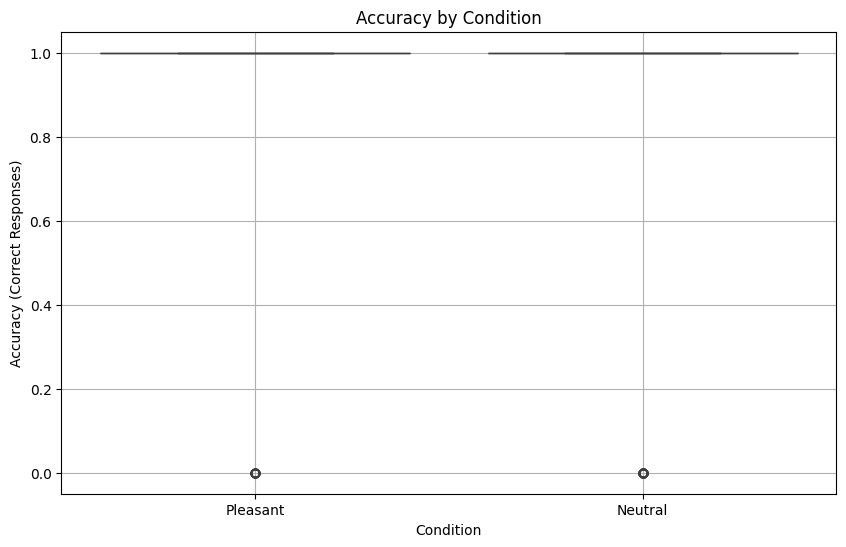

Shapiro-Wilk Test for Pleasant Condition: ShapiroResult(statistic=0.32572347719499806, pvalue=3.9175466323343814e-38)
Shapiro-Wilk Test for Neutral Condition: ShapiroResult(statistic=0.39668470076029927, pvalue=7.812080472539844e-41)
Levene's Test: LeveneResult(statistic=3.9712144729760235, pvalue=0.04653616451188697)
Mann-Whitney U test result: MannwhitneyuResult(statistic=148770.0, pvalue=0.023302428794398238)


In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Define paths
pleasant_condition_path = "./results/"
neutral_condition_path = "./results/"

# Function to read data from files
def read_data(condition_path, con):
    data = []
    for filename in os.listdir(condition_path):
        if filename.endswith('con1.txt') and con:
            file_path = os.path.join(condition_path, filename)
            df = pd.read_csv(file_path)
            data.append(df)
        elif filename.endswith('con0.txt') and not con:
            file_path = os.path.join(condition_path, filename)
            df = pd.read_csv(file_path)
            data.append(df)
    return pd.concat(data, ignore_index=True)

# Read data for both conditions
pleasant_data = read_data(pleasant_condition_path, True)
neutral_data = read_data(neutral_condition_path, False)

# Add a column for condition
pleasant_data['Condition'] = 'Pleasant'
neutral_data['Condition'] = 'Neutral'

# Combine data into a single DataFrame
combined_data = pd.concat([pleasant_data, neutral_data], ignore_index=True)

# Calculate accuracy
combined_data['Accuracy'] = combined_data['Accuracy'].astype(int)

# Group by condition and calculate mean accuracy and standard deviation
accuracy_summary = combined_data.groupby('Condition')['Accuracy'].agg(['mean', 'std', 'count']).reset_index()

# Print summary statistics
print("Accuracy Summary:")
print(accuracy_summary)

# Visualization of accuracy
plt.figure(figsize=(10, 6))
sns.boxplot(x='Condition', y='Accuracy', data=combined_data)
plt.title('Accuracy by Condition')
plt.ylabel('Accuracy (Correct Responses)')
plt.xlabel('Condition')
plt.grid()
plt.savefig(r'./figasfuck.png')
plt.show()

# Statistical tests
# Check normality using Shapiro-Wilk test
shapiro_pleasant = stats.shapiro(combined_data[combined_data['Condition'] == 'Pleasant']['Accuracy'])
shapiro_neutral = stats.shapiro(combined_data[combined_data['Condition'] == 'Neutral']['Accuracy'])

print(f"Shapiro-Wilk Test for Pleasant Condition: {shapiro_pleasant}")
print(f"Shapiro-Wilk Test for Neutral Condition: {shapiro_neutral}")

# Levene's test for equality of variances
levene_test = stats.levene(
    combined_data[combined_data['Condition'] == 'Pleasant']['Accuracy'],
    combined_data[combined_data['Condition'] == 'Neutral']['Accuracy']
)

print(f"Levene's Test: {levene_test}")

# Two-sample t-test if assumptions are met
if shapiro_pleasant.pvalue > 0.05 and shapiro_neutral.pvalue > 0.05 and levene_test.pvalue > 0.05:
    t_test_result = stats.ttest_ind(
        combined_data[combined_data['Condition'] == 'Pleasant']['Accuracy'],
        combined_data[combined_data['Condition'] == 'Neutral']['Accuracy'],
        equal_var=True
    )
    print(f"Two-sample t-test result: {t_test_result}")
else:
    # Mann-Whitney U test as a non-parametric alternative
    mann_whitney_result = stats.mannwhitneyu(
        combined_data[combined_data['Condition'] == 'Pleasant']['Accuracy'],
        combined_data[combined_data['Condition'] == 'Neutral']['Accuracy'],
        alternative='greater'
    )
    print(f"Mann-Whitney U test result: {mann_whitney_result}")

# Save summary statistics to a CSV file
accuracy_summary.to_csv(r'./accsum.csv', index=False)
